In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import numpy as np
from matplotlib import pyplot as plt
from pylamp.neural.sequentiel import Sequentiel
from pylamp.neural.layers import Linear
from pylamp.loss.losses import CrossEntropyLoss
from pylamp.optim.optimizer import Optim
from pylamp.optim.optimizer import SGD
from pylamp.utils.usps import load_usps, show_usps

In [20]:
def plot_loss(losses):
    epochs = range(1, len(losses) + 1)
    plt.plot(epochs, losses, label='Training Loss')
    plt.title('Training Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
def print_accuracy(model,X_test,y_test):
    y_pred = np.argmax(model.forward(X_test),axis=1)

    accuracy = np.sum(y_test == y_pred)/len(y_test)

    print(f'Accuracy = {accuracy}')

## Loading Data

In [21]:
uspsdatatrain = "./data/USPS/USPS_train.txt"
uspsdatatest = "./data/USPS/USPS_test.txt"
X_train, y_train = load_usps(uspsdatatrain)
X_test, y_test = load_usps(uspsdatatest)

Label:  6
x size:  256


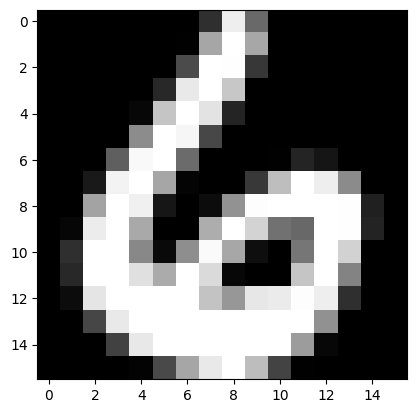

In [22]:
print('Label: ',y_train[0])
print("x size: ",len(X_train[0]))
show_usps(X_train[0])

## Testing Multi Class Model

In [23]:
num_classes = 10

### One hot encode label

In [24]:
y_train_one_hot = np.eye(num_classes)[y_train]

In [25]:
y_train_one_hot[0], y_train[0]

(array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]), 6)

## Sequentiel with a single linear layer

In [30]:
sequentiel_model = Sequentiel()

# no need for softmax activation because it is included in the loss function
sequentiel_model.add_module(Linear(input_size=256, output_size=10))

loss_func = CrossEntropyLoss()

optimizer = Optim(sequentiel_model,loss_func,1e-5)

batch_size = 256
epochs = 3000

sequentiel_model_losses = SGD(optimizer,X_train, y_train_one_hot, batch_size,epochs,verbose=True)


Epoch 1/3000, Average Loss: 12.618715868713087
Epoch 301/3000, Average Loss: 2.1656389605038466
Epoch 601/3000, Average Loss: 1.8946343070306029
Epoch 901/3000, Average Loss: 1.8122203280495395
Epoch 1201/3000, Average Loss: 1.779559845319572
Epoch 1501/3000, Average Loss: 1.762116334781297
Epoch 1801/3000, Average Loss: 1.7523727139443093
Epoch 2101/3000, Average Loss: 1.746228860078437
Epoch 2401/3000, Average Loss: 1.7420474572769087
Epoch 2701/3000, Average Loss: 1.7399764738718801
Training finished.


Accuracy = 0.8295964125560538


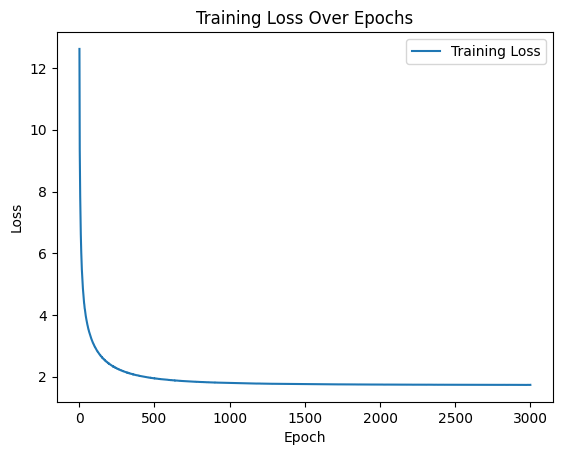

In [31]:
print_accuracy(sequentiel_model,X_test,y_test)
plot_loss(sequentiel_model_losses)

## Linear Module

In [32]:
model_linear = Linear(input_size=256, output_size=10)

loss_func = CrossEntropyLoss()

optimizer_linear = Optim(model_linear,loss_func,1e-5)

batch_size = 256
epochs = 3000

model_linear_losses = SGD(optimizer_linear,X_train, y_train_one_hot, batch_size,epochs,verbose=True)


Epoch 1/3000, Average Loss: 14.566306286110175
Epoch 301/3000, Average Loss: 2.1549125026727896
Epoch 601/3000, Average Loss: 1.89903557757474
Epoch 901/3000, Average Loss: 1.816160842845467
Epoch 1201/3000, Average Loss: 1.7811006901513076
Epoch 1501/3000, Average Loss: 1.7619927694157675
Epoch 1801/3000, Average Loss: 1.752781720731469
Epoch 2101/3000, Average Loss: 1.745449652699453
Epoch 2401/3000, Average Loss: 1.7417276697429875
Epoch 2701/3000, Average Loss: 1.7379013982766625
Training finished.


Accuracy = 0.8221225710014948


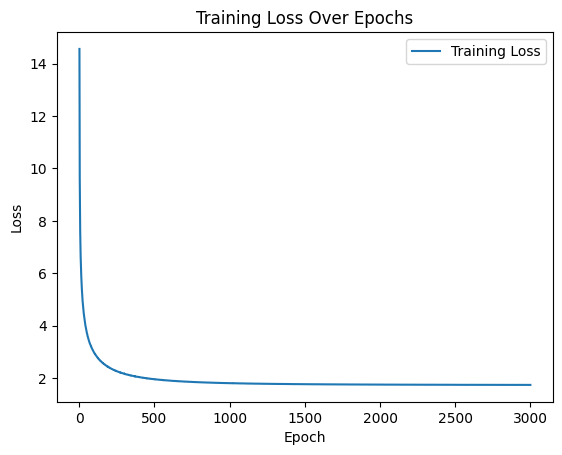

In [34]:
print_accuracy(model_linear,X_test,y_test)
plot_loss(model_linear_losses)